In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib
import json
    
def trim_and_cast_to_int(val):
    return int(val.replace(' ', '')) if val else None

def parse(val):
    val['production_year'] = trim_and_cast_to_int(val['production_year'])
    val['mileage'] = trim_and_cast_to_int(val['mileage'].replace('km', '')) if val['mileage'] else None
    val['displacement_capacity'] = trim_and_cast_to_int(val['displacement_capacity'].replace('cm3', '')) if val['displacement_capacity'] else None
    val['power'] = trim_and_cast_to_int(val['power'].replace('KM', '')) if val['power'] else None

    return val

# functions above no longer needed

file = 'filtered_otomoto.json'
with open(file) as datafile:
    dataset = json.load(datafile)

dataframe = pd.DataFrame.from_dict(dataset)
dataframe = dataframe.filter(['brand', 'mileage', 'price', 'production_year'])
dataframe = dataframe.dropna()
dataframe[['mileage', 'production_year']] = dataframe[['mileage', 'production_year']].astype(int)
dataframe = dataframe.sort_values(['brand', 'production_year'])

brands = dataframe['brand'].unique().tolist()

brand_threshold = 3000
final_dataframes = {}

for brand in brands:
    brand_dataframe = dataframe.loc[dataframe.brand==brand]
    if brand_dataframe.shape[0] > brand_threshold:
        final_dataframes[brand] = brand_dataframe[['mileage', 'production_year', 'price']]


<Figure size 432x288 with 0 Axes>

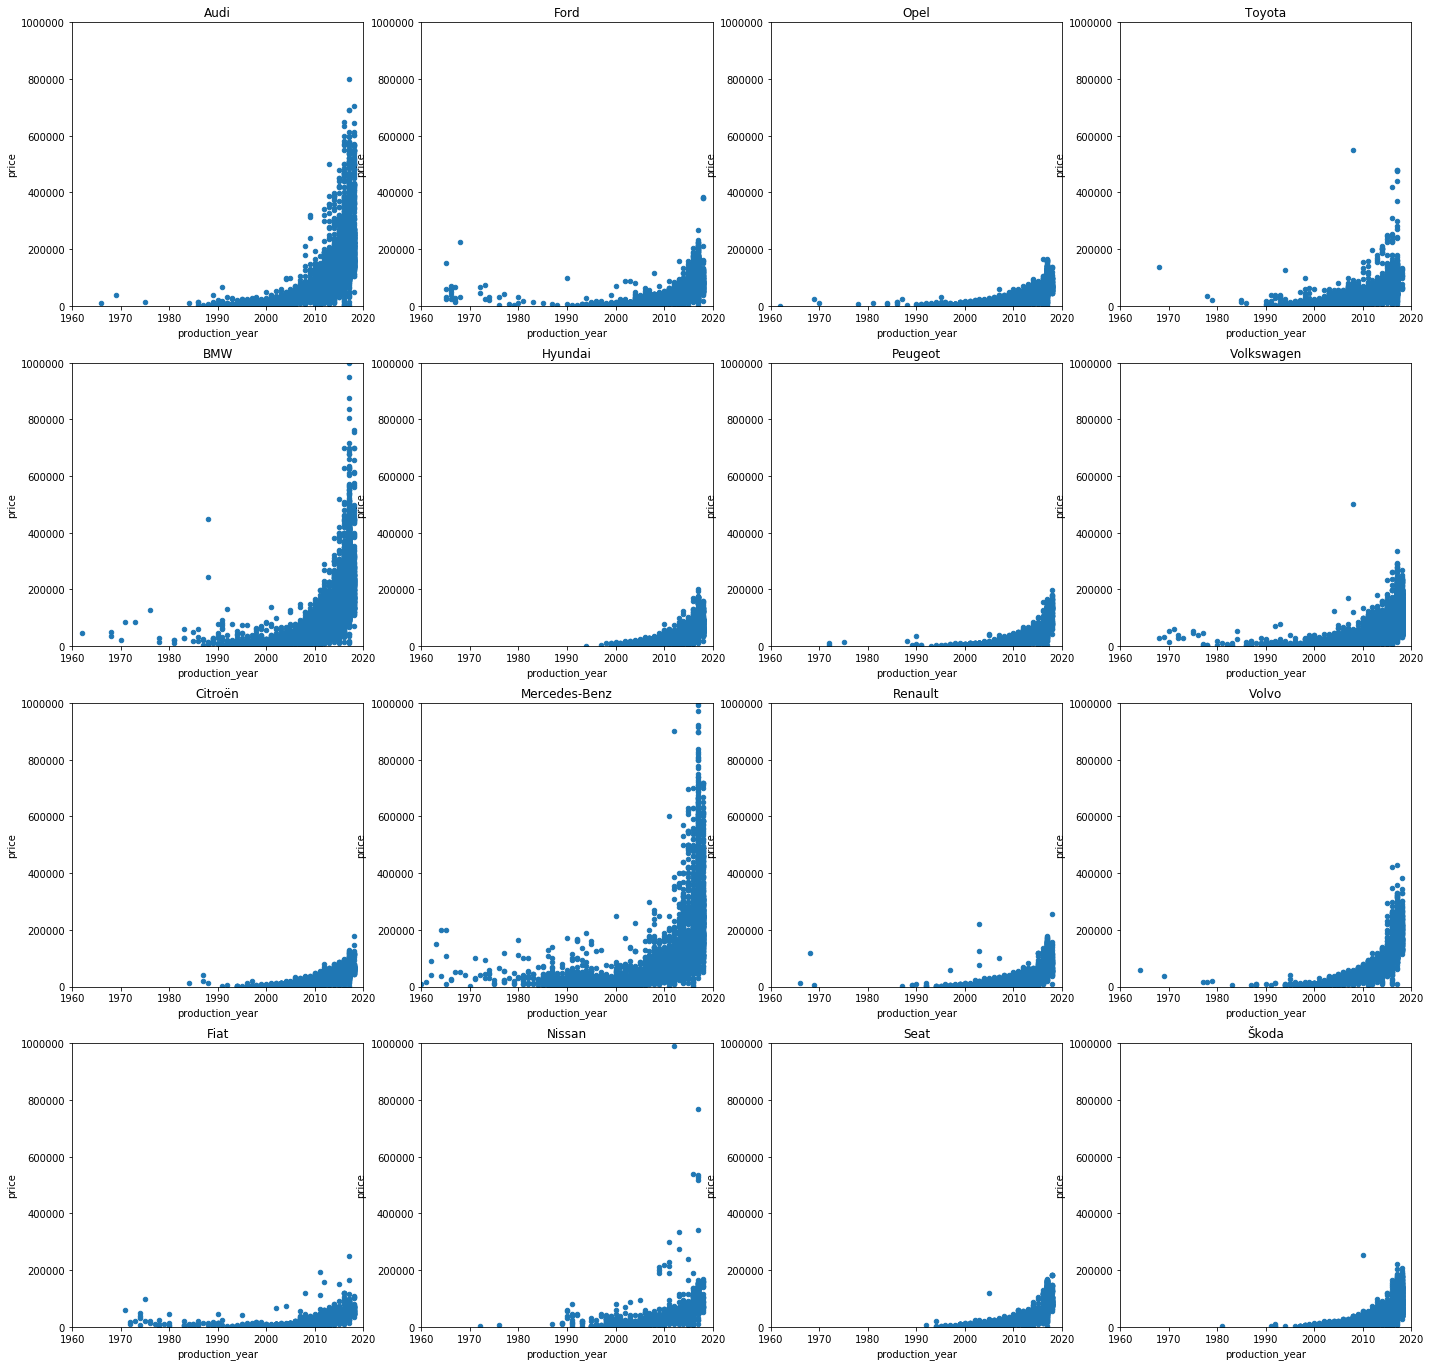

In [20]:
plt.viridis()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24,24), facecolor='w')
for index, (brand, brand_dataframe) in enumerate(final_dataframes.items()):
    ax = brand_dataframe.plot.scatter(x='production_year', y='price', ax=axes[index%4][index//4])
    ax.set_ylim([0, 1000000])
    ax.set_xlim([1960, 2020])
    ax.set_title(brand)
                


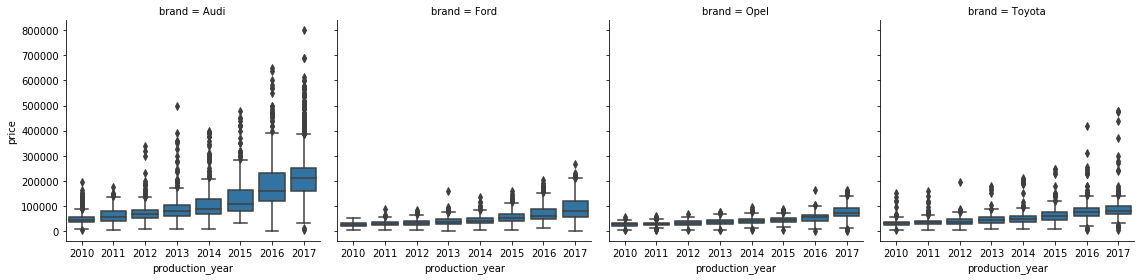

In [5]:
df = dataframe.loc[dataframe.brand.isin(['Audi', 'Toyota', 'Ford', 'Opel'])]
g = sns.FacetGrid(df, size=4, col='brand')
g = g.map(sns.boxplot, 'production_year', 'price', order=range(2010, 2018))
    

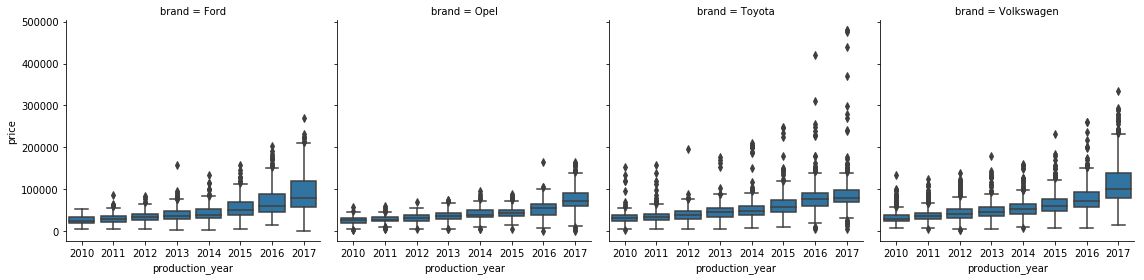

In [5]:
df = dataframe.loc[dataframe.brand.isin(['Toyota', 'Ford', 'Opel', 'Volkswagen'])]
g = sns.FacetGrid(df, size=4, col='brand')
g = g.map(sns.boxplot, 'production_year', 'price', order=range(2010, 2018))
 

<Figure size 432x288 with 0 Axes>

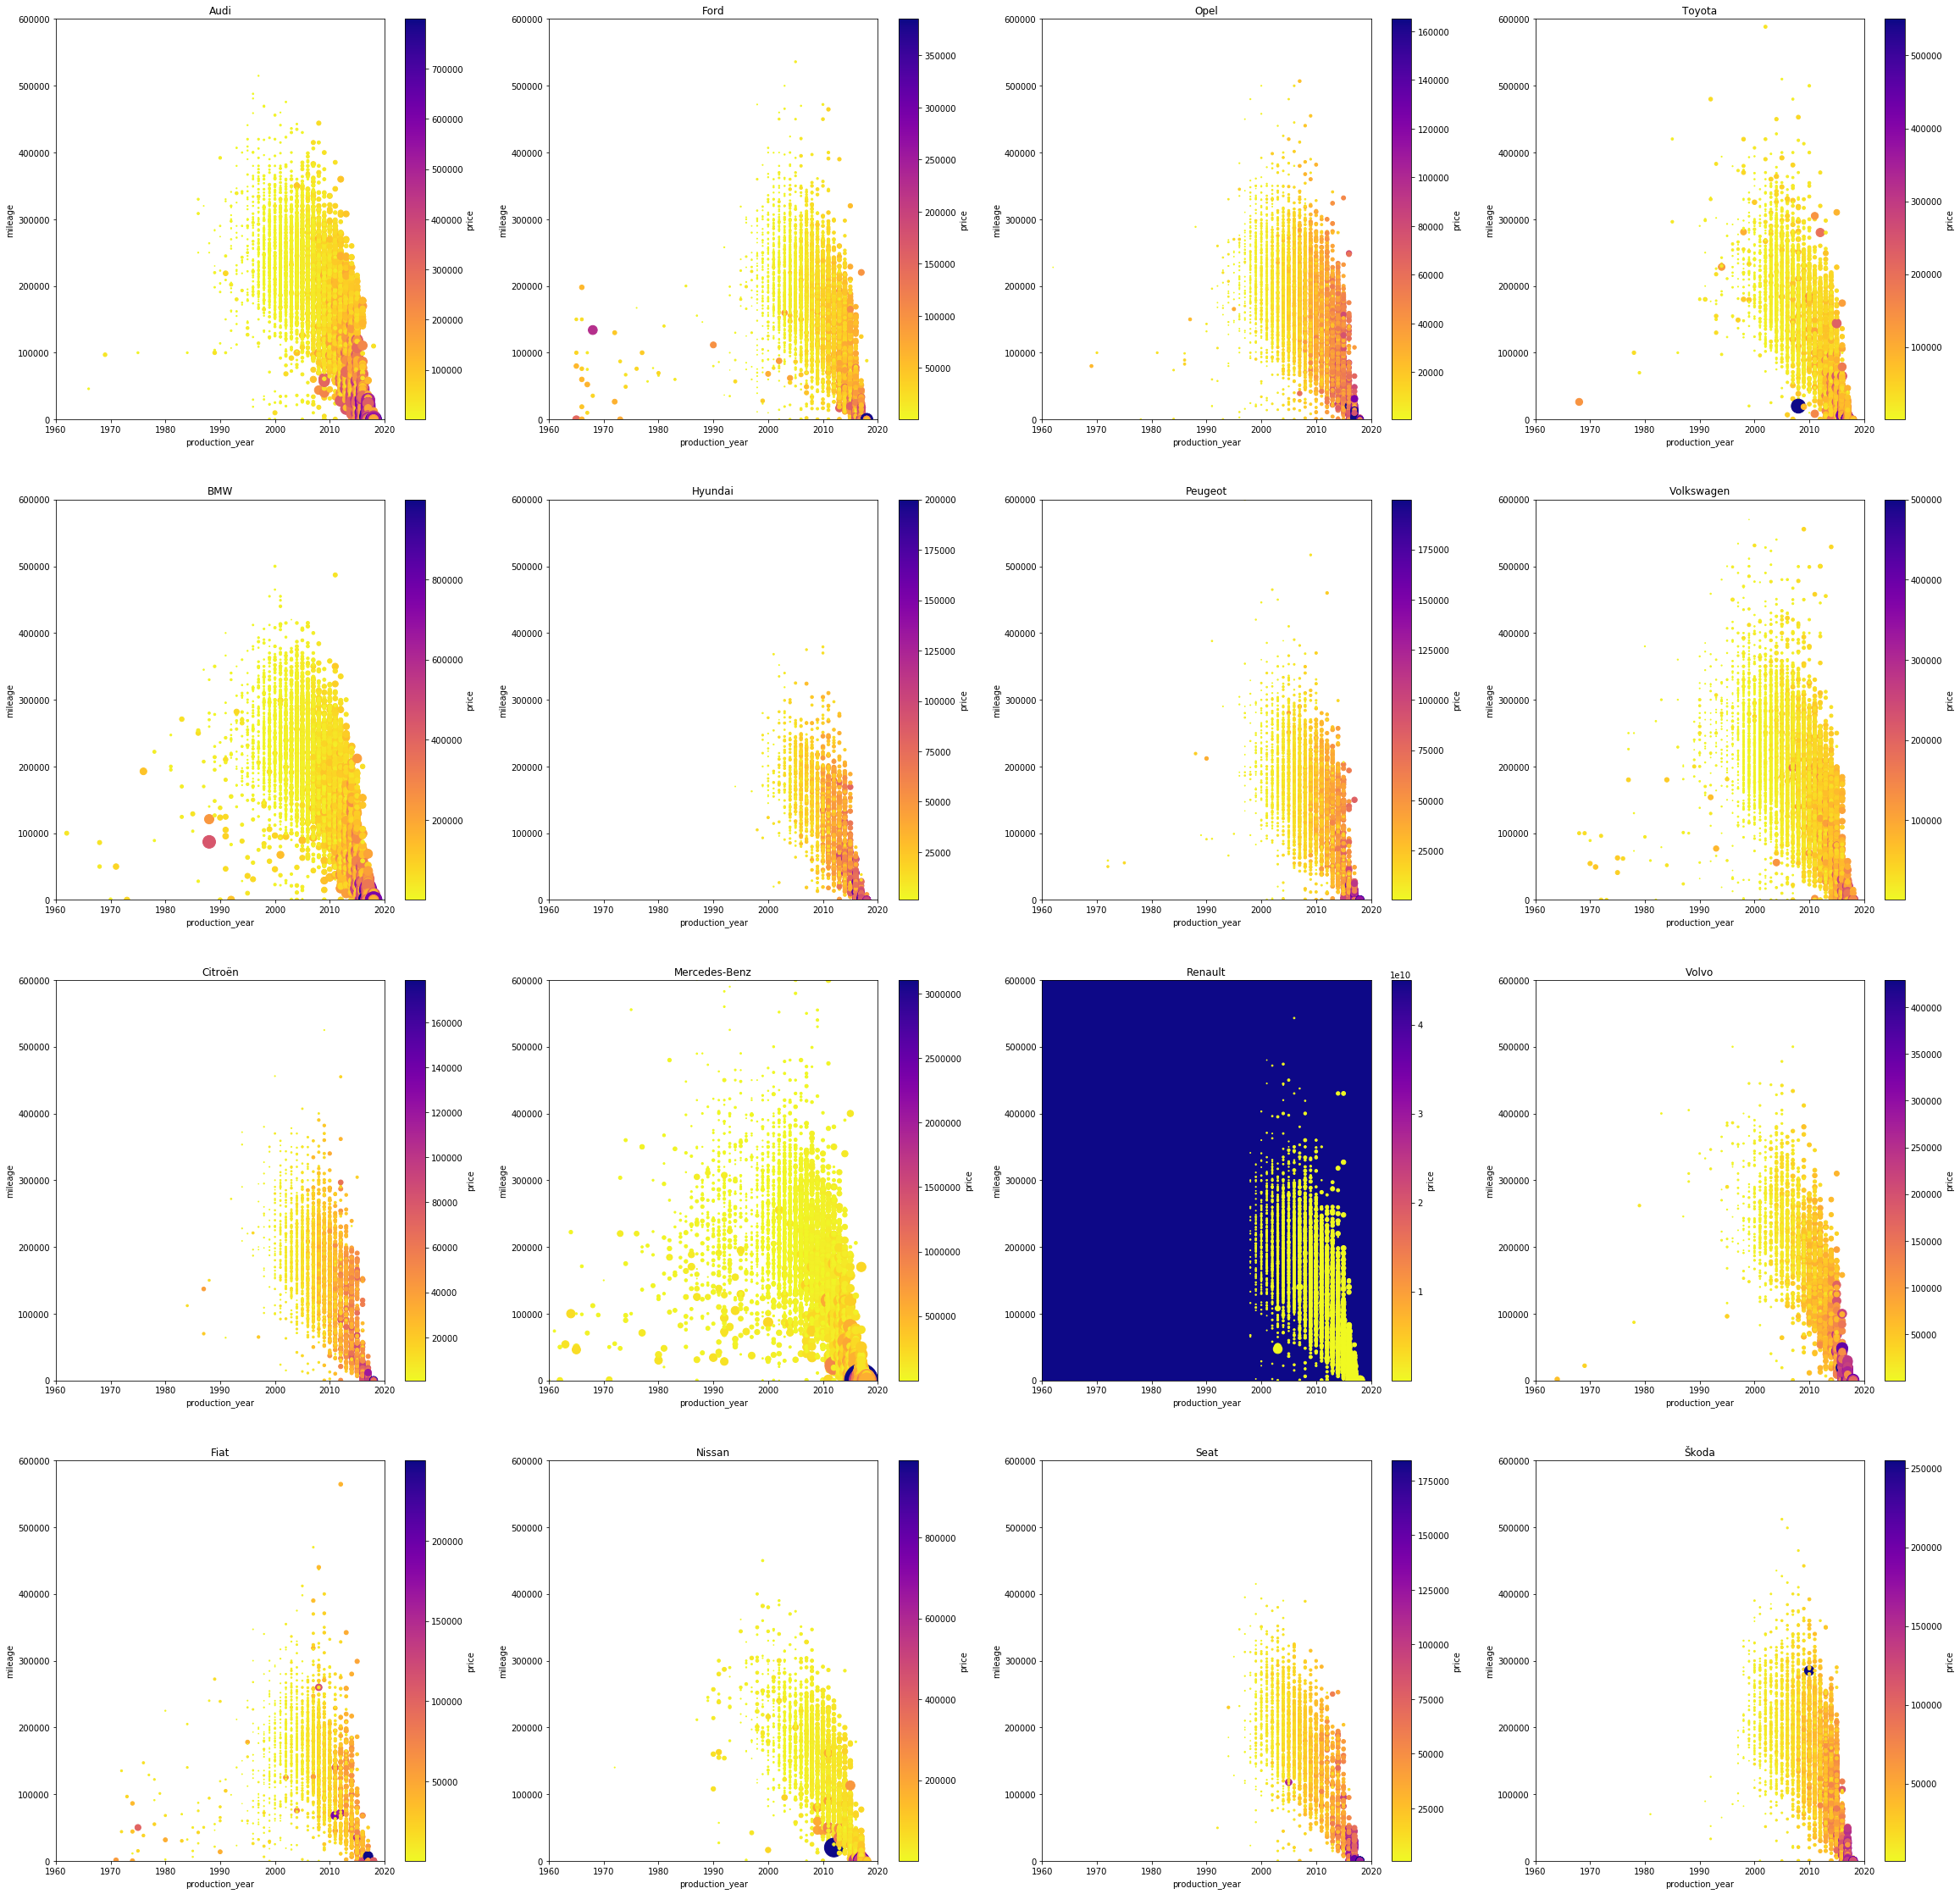

In [11]:
plt.viridis()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(40,40), facecolor='w')
for index, (brand, brand_dataframe) in enumerate(final_dataframes.items()):
    ax = brand_dataframe.plot.scatter(
        x='production_year', y='mileage', c='price',
        s=brand_dataframe['price']*0.0005,
        cmap=plt.cm.plasma_r, ax=axes[index%4][index//4]
    )
    ax.set_ylim([0, 600000])
    ax.set_xlim([1960, 2020])
    ax.set_title(brand)
                


<Figure size 432x288 with 0 Axes>

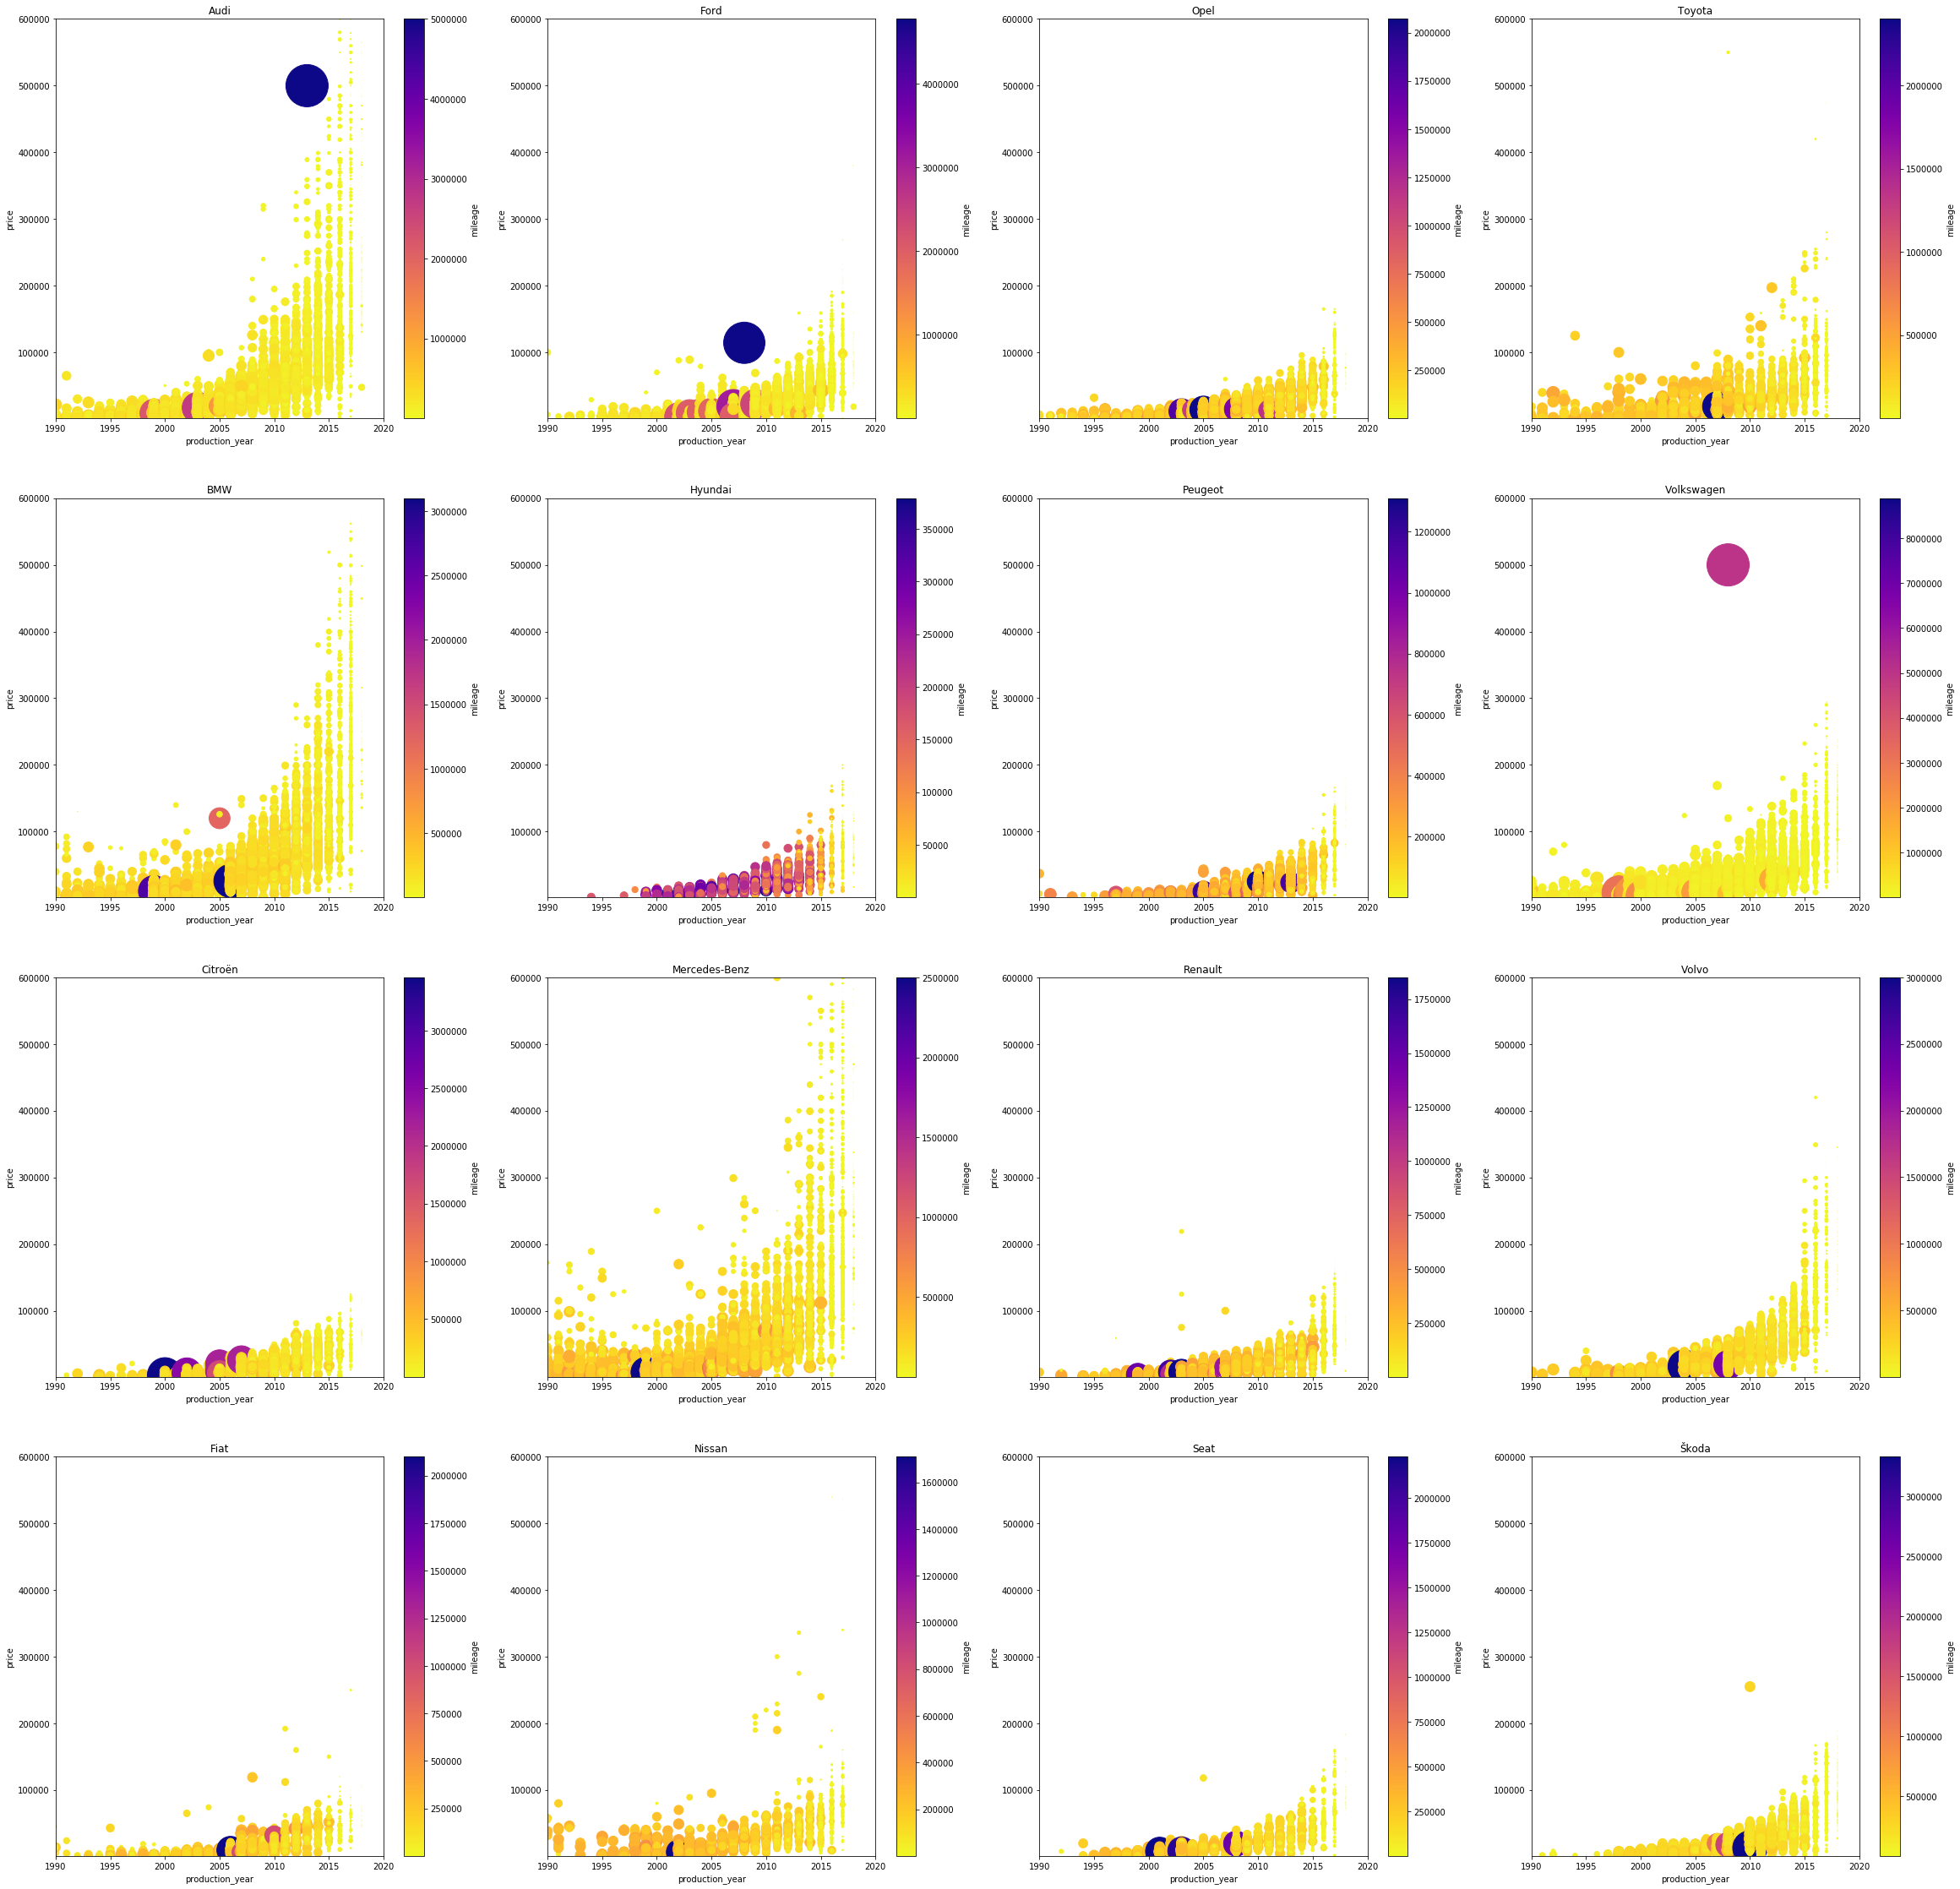

In [12]:
plt.viridis()
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(40,40), facecolor='w')
for index, (brand, brand_dataframe) in enumerate(final_dataframes.items()):
    ax = brand_dataframe.plot.scatter(
        x='production_year', y='price', c='mileage',
        s=brand_dataframe['mileage']*0.0005,
        cmap=plt.cm.plasma_r, ax=axes[index%4][index//4]
    )
    ax.set_xlim([1990, 2020])
    ax.set_ylim([1e3, 6e5])
    ax.set_title(brand)
                
